Diabetes Prediction Model 

Diabetes is a disease which occurs because of too much sugar in blood. It affects of phenomenon of body turning the foor into energy.
This project will help to identify if a person has diabetes or not using certain features.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Build a model to accurately predict whether the patients in the dataset have diabetes or not. Dataset Description The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

IMPORTING NECCESSARY LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score 
from sklearn.model_selection import cross_val_score 

c:\Python\Python310\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


READING THE DATA/ FIRST PEEK

In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


DATA CLEANING 

1. Looking for missing values, nan values
2. Looking for correct data type
3. Look for outliers

Looking for missing values

In [3]:
print(data.columns)
print(data.shape)
print(data.isnull().sum())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looks great that there are no null and nan values.

Data Type

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Every feature is in its correct data type.

Looking for outliers

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


By the description it looks like age, outcome, pregnancy are okay as it is, whereas the columns like blood_pressure, skin_thickness,insulin and bmi has outliers where the min_val is 0 and more than 25% of data are 0 so we need to figure it out.

If you have type 1 diabetes, your pancreas is unable to produce any insulin so keeping this in account, the insulin level can be zero.

Extremely low or zero DBP is a possibility in cases of severe hypotension, stiff arteries in elderly, diabetes, arteriovenous malformation, and aortic dissection.

Glucose level can be zero in extreme cases so we leave that feature also as such.

Now it is left with BMI feature , but body mass index cannot be zero so we need to fix it.

In [7]:
q1=data['BMI'].quantile(0.25)
q3=data['BMI'].quantile(0.75)
iqr=q3-q1 
minimum=q1-1.5*(iqr)
maximum=q3+1.5*(iqr)
print(minimum,maximum)

13.35 50.550000000000004


We can leave the maximum value but we clip the minimum value.

In [8]:
data['BMI']=data['BMI'].clip(minimum,67)

Splitting data

In [9]:
X=data[['Pregnancies','Glucose','Insulin','BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]
y=data['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

Scaling the data

In [10]:
scale=StandardScaler() 
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

LOGISTIC REGRESSION

In [11]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

0.7447916666666666
[[100  17]
 [ 32  43]]
0.6370370370370371


c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


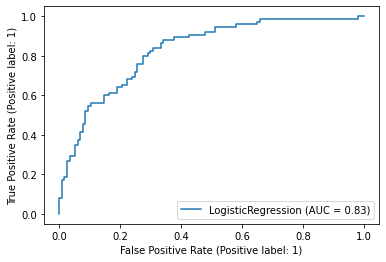

In [12]:
print(log_reg.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
plot_roc_curve(log_reg,X_test,y_test)

AUROC Score = 0.82 --> Logistic Regression

K Nearest Neighbors Classification

To find the best value of parameter

In [13]:
cross_val_knn=[]
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,50]:
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  print("k value:",i,"train_score:",knn.score(X_train,y_train),"score:",np.mean(cross_val_score(knn,X_train,y_train,cv=10)))
  cross_val_knn.append(cross_val_score(knn,X_train,y_train,cv = 10).mean())

k value: 1 train_score: 1.0 score: 0.7096491228070174
k value: 2 train_score: 0.8368055555555556 score: 0.7150332728372657
k value: 3 train_score: 0.8524305555555556 score: 0.7288263762855414
k value: 4 train_score: 0.8142361111111112 score: 0.7323653962492438
k value: 5 train_score: 0.8125 score: 0.7444343617664851
k value: 6 train_score: 0.8072916666666666 score: 0.7549001814882033
k value: 7 train_score: 0.7986111111111112 score: 0.7566243194192377
k value: 8 train_score: 0.8003472222222222 score: 0.7479733817301876
k value: 9 train_score: 0.8090277777777778 score: 0.7549001814882033
k value: 10 train_score: 0.7899305555555556 score: 0.7463097398669086
k value: 11 train_score: 0.8020833333333334 score: 0.7653962492437992
k value: 12 train_score: 0.7951388888888888 score: 0.7583182093163946
k value: 13 train_score: 0.7864583333333334 score: 0.7602540834845735
k value: 14 train_score: 0.7847222222222222 score: 0.7601633393829401
k value: 15 train_score: 0.7934027777777778 score: 0.754

In [14]:
knn=KNeighborsClassifier(n_neighbors=15).fit(X_train,y_train)
y_pred=knn.predict(X_test)

0.7239583333333334
[[102  15]
 [ 38  37]]
0.5826771653543308


c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


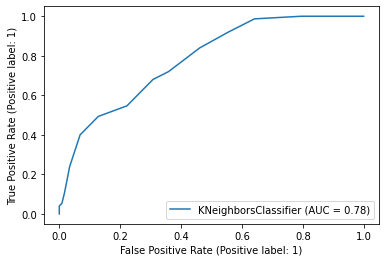

In [15]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score 
print(knn.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
plot_roc_curve(knn,X_test,y_test)

AUROC Score = 0.78 ---> K Nearest Neigbors

Decision Tree

In [16]:
max_depth=np.arange(1,15)
cross_val_dt=[]
for d in max_depth:
  dt= DecisionTreeClassifier(max_depth=d, random_state=0)
  dt.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt,X_train,y_train,cv = 15).mean())

Depth :  1  train Score  :  0.7361111111111112 cross_val_score :  0.7205578047683311
Depth :  2  train Score  :  0.7760416666666666 cross_val_score :  0.7465587044534414
Depth :  3  train Score  :  0.7951388888888888 cross_val_score :  0.7362573099415204
Depth :  4  train Score  :  0.8246527777777778 cross_val_score :  0.7450292397660819
Depth :  5  train Score  :  0.8489583333333334 cross_val_score :  0.7501124606387765
Depth :  6  train Score  :  0.8715277777777778 cross_val_score :  0.7274853801169591
Depth :  7  train Score  :  0.9114583333333334 cross_val_score :  0.7309041835357625
Depth :  8  train Score  :  0.9392361111111112 cross_val_score :  0.7306792622582098
Depth :  9  train Score  :  0.9583333333333334 cross_val_score :  0.7186234817813765
Depth :  10  train Score  :  0.9774305555555556 cross_val_score :  0.7219523166891588
Depth :  11  train Score  :  0.9913194444444444 cross_val_score :  0.7168241115609537
Depth :  12  train Score  :  0.9947916666666666 cross_val_score

In [17]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train) 
y_pred=dt.predict(X_test)

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


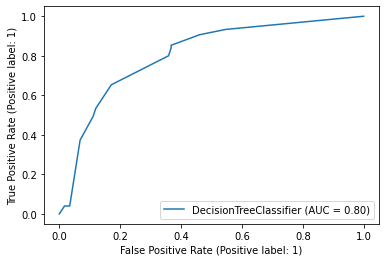

In [18]:
dt.score(X_test,y_test)
confusion_matrix(y_test,y_pred) 
f1_score(y_test,y_pred)
plot_roc_curve(dt,X_test,y_test)

AUROC Score = 0.75 ---> Decision Tree 

In [19]:
ftImp = list(zip(dt.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
1,0.475740,Glucose
2,0.161442,BloodPressure
7,0.154130,Age
3,0.153817,SkinThickness
0,0.028113,Pregnancies
6,0.026758,DiabetesPedigreeFunction
4,0.000000,Insulin
5,0.000000,BMI


Random Forest Classifier

In [20]:
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf=RandomForestClassifier(max_depth=d, random_state=0)
  rf.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.6927125506072875
Depth :  2 cross_val_score :  0.7449392712550609
Depth :  3 cross_val_score :  0.7691408007197482
Depth :  4 cross_val_score :  0.7690958164642375
Depth :  5 cross_val_score :  0.7760233918128655
Depth :  6 cross_val_score :  0.771030139451192
Depth :  7 cross_val_score :  0.7777777777777779
Depth :  8 cross_val_score :  0.7760233918128654
Depth :  9 cross_val_score :  0.7794421952316689
Depth :  10 cross_val_score :  0.7846603688708953
Depth :  11 cross_val_score :  0.7812415654520918
Depth :  12 cross_val_score :  0.7690508322087269
Depth :  13 cross_val_score :  0.7794871794871795
Depth :  14 cross_val_score :  0.7778227620332885
Depth :  15 cross_val_score :  0.7708502024291499
Depth :  16 cross_val_score :  0.7708052181736391
Depth :  17 cross_val_score :  0.7691408007197481
Depth :  18 cross_val_score :  0.7674313990103464
Depth :  19 cross_val_score :  0.7674313990103464


In [21]:
rf=RandomForestClassifier(max_depth=16, random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


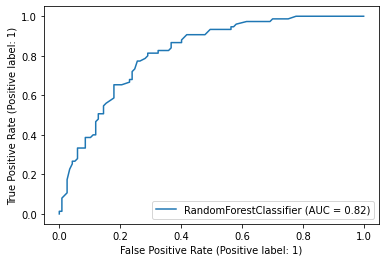

In [22]:
rf.score(X_test,y_test)
confusion_matrix(y_test,y_pred) 
f1_score(y_test,y_pred)
plot_roc_curve(rf,X_test,y_test)

AUROC Score = 0.80 ---> Random Forest Classifier

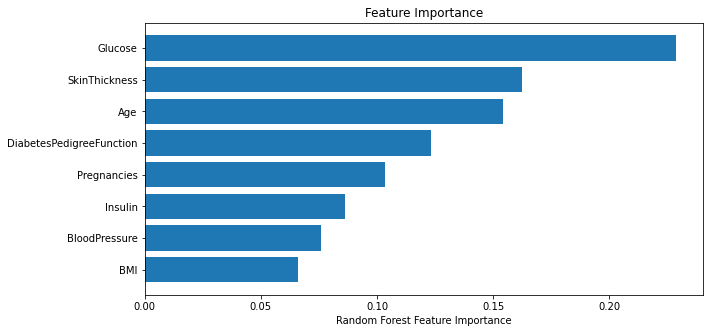

In [23]:
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

Gradient Boosting 

In [24]:
cross_val_gb=[]
for lr in [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.8,1]:
  gb= GradientBoostingClassifier(learning_rate=lr)
  gb.fit(X_train, y_train)
  print("Learning rate : ", lr, "cross_val_score : ", cross_val_score(gb,X_train,y_train,cv = 15).mean())
  cross_val_gb.append(cross_val_score(gb,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score :  0.750067476383266
Learning rate :  0.05 cross_val_score :  0.7619883040935673
Learning rate :  0.1 cross_val_score :  0.7672064777327936
Learning rate :  0.2 cross_val_score :  0.7673414304993251
Learning rate :  0.3 cross_val_score :  0.7482231219073324
Learning rate :  0.35 cross_val_score :  0.7479532163742689
Learning rate :  0.4 cross_val_score :  0.7464687359424202
Learning rate :  0.5 cross_val_score :  0.724021592442645
Learning rate :  0.8 cross_val_score :  0.7185784975258659
Learning rate :  1 cross_val_score :  0.7308591992802519


In [25]:
gb= GradientBoostingClassifier(learning_rate=0.05)
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)

c:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


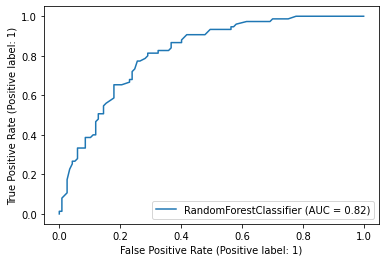

In [26]:
rf.score(X_test,y_test)
confusion_matrix(y_test,y_pred) 
f1_score(y_test,y_pred)
plot_roc_curve(rf,X_test,y_test)

AUROC Score = 0.80 ---> Gradient Boosting

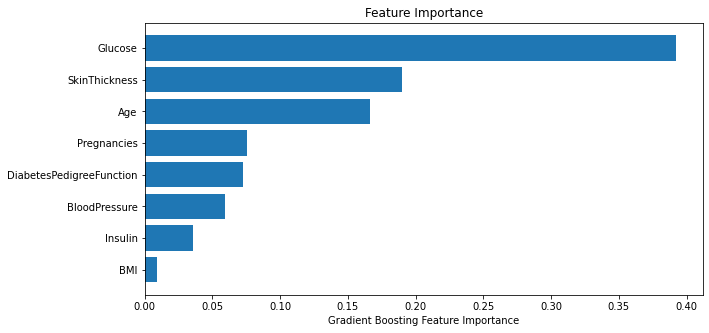

In [27]:
gb.feature_importances_
sorted_idx = gb.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], gb.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

Predicting the output:

The logistic regression algorithm gives us the best accuracy, we use that to deploy to model.

In [28]:
X=data[['Pregnancies','Glucose','Insulin','BMI','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Age']]
y=data['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [29]:
input_data=(3,170,225,34.5,64,37,0.356,30)
input_data=np.asarray(input_data)
input_data_reshape=input_data.reshape(1,-1)
prediction=log_reg.predict(input_data_reshape)
print(prediction)

[1]


Deploying the model

In [30]:
import pickle 
pi=open("diabetes_prediction.pkl","wb")
pickle.dump(log_reg,pi)
pi.close()